In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/Practice Python/OnlineRetail.xlsx')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.CustomerID.nunique()

4372

In [ ]:
print('Min:{}; Max:{}'.format(min(df.InvoiceDate), max(df.InvoiceDate)))

Min:2010-12-01 08:26:00; Max:2011-12-09 12:50:00


**Cohort Analysis**

**Step 1: Lấy ra tháng từ cột InvoiceDate**

In [ ]:
# get Month from InvoiceDate

import datetime as dt

# Define hàm lấy về ngày đầu tiên của tháng tương ứng.
def extract_month(date_value):
  return dt.datetime(date_value.year, date_value.month, 1)

In [ ]:
# Tạo một hàm InvoiceMonth 

df['InvoiceMonth'] = df['InvoiceDate'].apply(extract_month)
df[['InvoiceDate','InvoiceMonth']].head()

,InvoiceDate,InvoiceMonth
0,2010-12-01 08:26:00,2010-12-01
1,2010-12-01 08:26:00,2010-12-01
2,2010-12-01 08:26:00,2010-12-01
3,2010-12-01 08:26:00,2010-12-01
4,2010-12-01 08:26:00,2010-12-01


**Step 2: Kết nối cohort tới mỗi cột**

In [ ]:
group = df.groupby(['CustomerID'])['InvoiceMonth']

In [ ]:
group.head()

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
541768   2011-12-01
541769   2011-12-01
541770   2011-12-01
541771   2011-12-01
541772   2011-12-01
Name: InvoiceMonth, Length: 21211, dtype: datetime64[ns]

In [ ]:
df['CohortMonth'] = group.transform('min')
df[['CustomerID', 'InvoiceDate','InvoiceMonth','CohortMonth']].head()

,CustomerID,InvoiceDate,InvoiceMonth,CohortMonth
0,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01
1,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01
2,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01
3,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01
4,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01


**Step 3: Kết nối chỉ số Cohort Index tới mỗi giao dịch**

In [ ]:
def parse_dates_int(date_column):
  year = date_column.dt.year
  month = date_column.dt.month
  return year, month


In [ ]:
invoice_year, invoice_month = parse_dates_int(df['InvoiceDate'])

cohort_year, cohort_month = parse_dates_int(df['CohortMonth'])

cohort_year.head(), cohort_month.head()

(0    2010.0
 1    2010.0
 2    2010.0
 3    2010.0
 4    2010.0
 Name: CohortMonth, dtype: float64, 0    12.0
 1    12.0
 2    12.0
 3    12.0
 4    12.0
 Name: CohortMonth, dtype: float64)

In [ ]:
# Tính toán sự khác nhau giữa các năm
year_diff = invoice_year - cohort_year

# Tính toán sự khác nhau giữa các tháng
month_diff = invoice_month - cohort_month

df['CohortIndex'] = year_diff*12 + month_diff +1

In [ ]:
df[['CustomerID', 'InvoiceDate', 'InvoiceMonth', 'CohortMonth', 'CohortIndex']].head()

,CustomerID,InvoiceDate,InvoiceMonth,CohortMonth,CohortIndex
0,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01,1.0
1,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01,1.0
2,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01,1.0
3,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01,1.0
4,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01,1.0


**Step 4: Tính toán số lượng khách hàng duy nhất trong mỗi nhóm**

In [ ]:
grouping = df.groupby(['CohortMonth', 'CohortIndex'])

In [ ]:
# Counting the number of unique values per customer ID in each group and storing in a Dataframe
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Assigning column names to the dataframe created above
cohort_data.columns = ['CohortMonth', 'CohortIndex', 'Count of unique CustomerID']

# Printing top 5 rows of Dataframe
cohort_data.head()

,CohortMonth,CohortIndex,Count of unique CustomerID
0,2010-12-01,1.0,948
1,2010-12-01,2.0,362
2,2010-12-01,3.0,317
3,2010-12-01,4.0,367
4,2010-12-01,5.0,341


**Step 5: Retention rate Calculation**

In [ ]:
retention_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Count of unique CustomerID')
retention_counts.head()

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN


In [ ]:
cohort_size = retention_counts.iloc[:,0]

In [ ]:
retention_rate = retention_counts.divide(cohort_size, axis=0)

retention_rate

retention_rate.round(3)*100

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Step 6: Visualizing the above retention rate**

In [ ]:
retention_rate.index=retention_rate.index.strftime('%Y-%m')
retention_rate.index

Index(['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05',
       '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11',
       '2011-12'],
      dtype='object', name='CohortMonth')

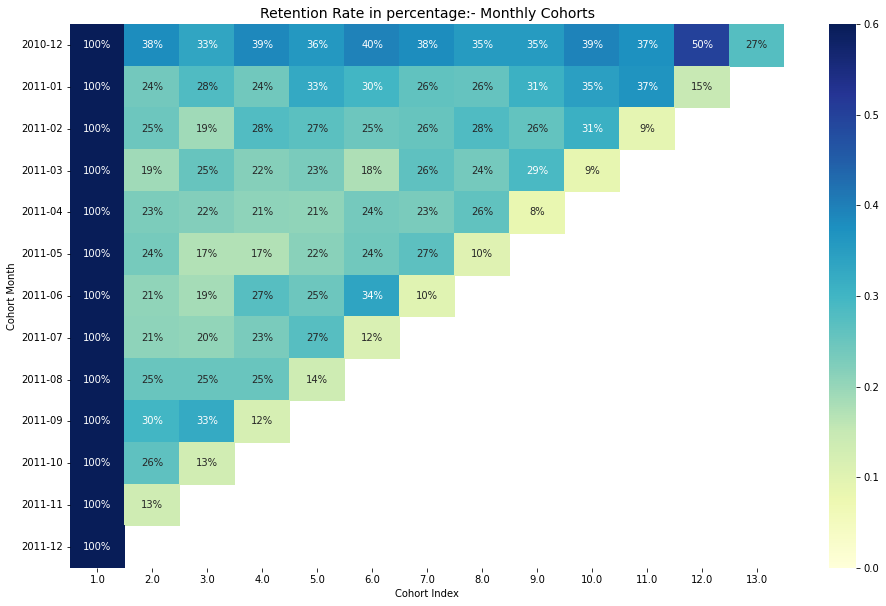

In [ ]:
plt.figure(figsize=(16,10))

plt.title('Retention Rate in percentage:- Monthly Cohorts', fontsize=14)

sns.heatmap(retention_rate, annot=True, fmt='.0%', cmap='YlGnBu', vmin=0.0, vmax=0.6)
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.yticks(rotation='360')
plt.show()